In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import custom functions
import functions_library as fl

In [3]:
#let's bring in the beauty review dataset with the cleaning and feature engineering steps applied
df = fl.pipedf('All_Beauty.json.gz')

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided
0,1,1,2015-02-19,A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,0,1,2,2,3,0,0,1,17,1
1,4,1,2014-12-18,A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,0,29,21,12,3,0,0,0,17,1
2,4,1,2014-08-10,A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,0,10,3,8,6,0,0,0,17,1
3,5,1,2013-03-11,A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,0,23,2,3,0,0,1,0,17,1
4,5,1,2011-12-25,A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",5,67,7,12,6,0,1,0,17,1


In [5]:
#getting names of non-token features and cluster for analysis
non_tokens_df = pd.concat([df.iloc[:,0:2],df.iloc[:,8:]],axis=1)
non_tokens_df.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided
0,1,1,0,1,2,2,3,0,0,1,17,1
1,4,1,0,29,21,12,3,0,0,0,17,1
2,4,1,0,10,3,8,6,0,0,0,17,1
3,5,1,0,23,2,3,0,0,1,0,17,1
4,5,1,5,67,7,12,6,0,1,0,17,1


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mm = MinMaxScaler()

In [8]:
#fit transform data using minmaxscaler
df2 = mm.fit_transform(non_tokens_df)

In [9]:
#put the scaled into a dataframe
df_scaled = pd.DataFrame(df2, columns = non_tokens_df.columns)

In [10]:
df_scaled.shape

(362252, 12)

In [11]:
df_scaled.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided
0,0.00,1.0,0.000000,0.000000,0.013423,0.090909,0.5,0.0,0.0,1.0,0.001846,1.0
1,0.75,1.0,0.000000,0.011466,0.140940,1.000000,0.5,0.0,0.0,0.0,0.001846,1.0
2,0.75,1.0,0.000000,0.003686,0.020134,0.636364,1.0,0.0,0.0,0.0,0.001846,1.0
3,1.00,1.0,0.000000,0.009009,0.013423,0.181818,0.0,0.0,1.0,0.0,0.001846,1.0
4,1.00,1.0,0.001838,0.027027,0.046980,1.000000,1.0,0.0,1.0,0.0,0.001846,1.0


In [12]:
from sklearn.cluster import KMeans

In [13]:
k_values = range(8,32)
inertia_scores = []
for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=1, verbose=1)
    kmeans_model.fit(df_scaled)
    inertia = kmeans_model.inertia_
    inertia_scores.append(inertia)

Initialization complete
Iteration 0, inertia 209380.6568270159
Iteration 1, inertia 136287.3991824369
Iteration 2, inertia 131903.82339664013
Iteration 3, inertia 130011.90442532378
Iteration 4, inertia 129121.9698640328
Iteration 5, inertia 129119.30802859405
Converged at iteration 5: center shift 4.969849802515782e-07 within tolerance 8.816612338243608e-06.
Initialization complete
Iteration 0, inertia 203742.17589608306
Iteration 1, inertia 138990.94589641548
Iteration 2, inertia 127669.67315718644
Iteration 3, inertia 126515.360864735
Iteration 4, inertia 126131.2412087186
Iteration 5, inertia 125934.90826740579
Iteration 6, inertia 125866.46196025622
Iteration 7, inertia 125835.37203943374
Converged at iteration 7: center shift 2.1833841976674775e-08 within tolerance 8.816612338243608e-06.
Initialization complete
Iteration 0, inertia 161778.19701364788
Iteration 1, inertia 119181.41907194389
Iteration 2, inertia 117210.49379479875
Iteration 3, inertia 116586.43388167147
Iteration 4

Initialization complete
Iteration 0, inertia 86620.4417446448
Iteration 1, inertia 65699.45091469033
Iteration 2, inertia 63788.796695916266
Iteration 3, inertia 63545.71022256846
Iteration 4, inertia 63496.061333728336
Iteration 5, inertia 63477.860975904674
Iteration 6, inertia 63474.8092686422
Iteration 7, inertia 63473.29442842838
Iteration 8, inertia 63468.703843684394
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 81809.17041494492
Iteration 1, inertia 64662.387756949465
Iteration 2, inertia 63640.16554506652
Iteration 3, inertia 63024.231650327114
Iteration 4, inertia 62808.06102787512
Iteration 5, inertia 62664.133217915616
Iteration 6, inertia 62544.38595339597
Iteration 7, inertia 62326.48948517043
Iteration 8, inertia 62008.22956588156
Iteration 9, inertia 61504.94982326641
Iteration 10, inertia 60928.76473704976
Iteration 11, inertia 60920.02343288982
Iteration 12, inertia 60919.90127414302
Converged at iteration 12: center shift 

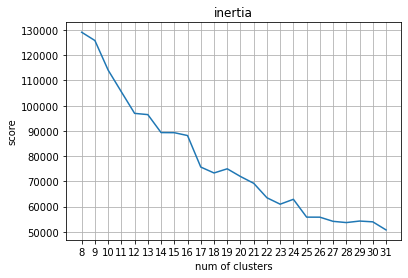

In [14]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()

The number of cluster to consider are: 11 13 18 23

In [15]:
kmeans_model25 = KMeans(n_clusters=23, init='k-means++', n_init=1, verbose=1)
#fitting KMeans on first 350 PCs
kmeans_model25.fit(df_scaled)

Initialization complete
Iteration 0, inertia 85539.74579618766
Iteration 1, inertia 64091.06546294452
Iteration 2, inertia 62931.321636958775
Iteration 3, inertia 62800.20413778156
Iteration 4, inertia 62716.54866012013
Iteration 5, inertia 62678.259420832765
Iteration 6, inertia 62673.76257608147
Iteration 7, inertia 62669.173880362476
Iteration 8, inertia 62659.3925307092
Iteration 9, inertia 62656.66461238191
Iteration 10, inertia 62655.25458226149
Iteration 11, inertia 62655.09415978407
Converged at iteration 11: center shift 3.10379050214927e-06 within tolerance 8.816612338243608e-06.


KMeans(n_clusters=23, n_init=1, verbose=1)

In [16]:
array=kmeans_model25.cluster_centers_[3]
print(array.tolist())

[0.9999999999999996, 0.9999999999999981, 0.00031580125863550775, 0.011808095375018996, 0.02536044682708026, 0.4820074809563246, 0.471568725598158, 1.0000000000000064, 0.9999999999999907, 2.220446049250313e-16, 0.051963256017193975, 0.999999999999998]


In [17]:
import joblib

In [18]:
#saving model to computer to be used for later analysis
joblib.dump(kmeans_model25, 'kmeans_model23.pkl')

['kmeans_model23.pkl']

In [19]:
df_scaled['cluster']=kmeans_model25.labels_

In [20]:
df_scaled.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided,cluster
0,0.00,1.0,0.000000,0.000000,0.013423,0.090909,0.5,0.0,0.0,1.0,0.001846,1.0,4
1,0.75,1.0,0.000000,0.011466,0.140940,1.000000,0.5,0.0,0.0,0.0,0.001846,1.0,18
2,0.75,1.0,0.000000,0.003686,0.020134,0.636364,1.0,0.0,0.0,0.0,0.001846,1.0,2
3,1.00,1.0,0.000000,0.009009,0.013423,0.181818,0.0,0.0,1.0,0.0,0.001846,1.0,1
4,1.00,1.0,0.001838,0.027027,0.046980,1.000000,1.0,0.0,1.0,0.0,0.001846,1.0,6


In [21]:
#saving the df to the computer in a compressed h5 format (saves faster than other compression techniques)
df_scaled.to_hdf('df_recon_23_kmeans.h5', key='df', mode='w')

In [22]:
# overall
df_scaled.groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
0     1.000000
7     1.000000
16    1.000000
15    1.000000
1     1.000000
9     1.000000
11    1.000000
6     1.000000
3     1.000000
21    0.883020
22    0.719283
10    0.686084
12    0.654537
13    0.592296
5     0.591025
2     0.571784
8     0.571557
18    0.570050
17    0.558308
4     0.000000
14    0.000000
19    0.000000
20    0.000000
Name: overall, dtype: float64

In [23]:
# verified purchase
df_scaled.groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
11    1.000000
20    1.000000
17    1.000000
16    1.000000
15    1.000000
12    1.000000
1     1.000000
10    1.000000
9     1.000000
8     1.000000
6     1.000000
5     1.000000
4     1.000000
3     1.000000
2     1.000000
18    1.000000
14    0.916935
7     0.914867
21    0.000000
0     0.000000
19    0.000000
13    0.000000
22    0.000000
Name: verified, dtype: float64

In [24]:
# number of votes
df_scaled.groupby('cluster').mean().iloc[:,2].sort_values(ascending=False)

cluster
19    0.001682
22    0.001429
13    0.001006
0     0.000823
5     0.000566
21    0.000484
14    0.000447
20    0.000396
4     0.000385
10    0.000380
7     0.000345
12    0.000340
3     0.000316
16    0.000304
11    0.000282
1     0.000282
2     0.000267
18    0.000267
6     0.000256
8     0.000255
15    0.000252
9     0.000177
17    0.000165
Name: vote, dtype: float64

In [25]:
#word count
df_scaled.groupby('cluster').mean().iloc[:,3].sort_values(ascending=False)

cluster
22    0.053570
13    0.035059
0     0.030481
19    0.028784
5     0.026426
7     0.021815
21    0.018974
10    0.015708
2     0.015406
12    0.015279
8     0.015170
18    0.014959
4     0.012829
20    0.012470
16    0.012137
1     0.011904
6     0.011881
3     0.011808
11    0.011795
15    0.011423
17    0.010568
14    0.009675
9     0.007822
Name: review_word_count, dtype: float64

In [26]:
# multiple review
df_scaled.groupby('cluster').mean().iloc[:,7].sort_values(ascending=False)

cluster
22    1.000000
7     1.000000
12    1.000000
3     1.000000
10    1.000000
5     1.000000
0     0.165991
9     0.091164
19    0.083893
21    0.070119
4     0.034285
14    0.031123
20    0.030869
17    0.014255
6     0.000000
8     0.000000
1     0.000000
2     0.000000
13    0.000000
15    0.000000
16    0.000000
18    0.000000
11    0.000000
Name: multipleReviews_reviewer, dtype: float64

In [27]:
# five start only
df_scaled.groupby('cluster').mean().iloc[:,8].sort_values(ascending=False)

cluster
0     1.000000
7     1.000000
16    1.000000
15    1.000000
1     1.000000
9     1.000000
11    1.000000
6     1.000000
3     1.000000
21    0.728689
8     0.000000
5     0.000000
10    0.000000
4     0.000000
12    0.000000
13    0.000000
14    0.000000
2     0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
22    0.000000
Name: reviewer_five_star_only, dtype: float64

In [28]:
# name provided
df_scaled.groupby('cluster').mean().iloc[:,10].sort_values(ascending=False)

cluster
5     0.969606
7     0.964856
22    0.142921
19    0.075965
1     0.064453
15    0.064101
6     0.063800
16    0.063702
11    0.061660
9     0.053226
3     0.051963
0     0.047711
2     0.047414
18    0.046523
8     0.045717
13    0.045325
21    0.042449
10    0.040901
12    0.039163
17    0.036419
4     0.031589
20    0.031063
14    0.028050
Name: numReviews_product, dtype: float64

In [29]:
df_cluster_3=df_scaled.loc[df_scaled["cluster"]==3]
df_cluster_11=df_scaled.loc[df_scaled["cluster"]==11]
df_cluster_17=df_scaled.loc[df_scaled["cluster"]==17]
df_cluster_21=df_scaled.loc[df_scaled["cluster"]==21]
final_df=pd.concat([df_cluster_3,df_cluster_11,df_cluster_17,df_cluster_21],axis=0)
final_df.shape

(51367, 13)

In [30]:
final_df["summary"]=df["summary"]
final_df["reviewText"]=df["reviewText"]
final_df.drop('cluster', inplace=True, axis=1)
final_df.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided,summary,reviewText
17,1.0,1.0,0.0,0.014742,0.006711,0.090909,1.000000,1.0,1.0,0.0,0.001730,1.0,Gorgeous!,"LOVE, LOVE, LOVE!! The movie was breathtaking ..."
4835,1.0,1.0,0.0,0.008600,0.020134,1.000000,0.833333,1.0,1.0,0.0,0.002538,1.0,Love these mini's,These are so great! I love how small they are....
4843,1.0,1.0,0.0,0.010647,0.053691,0.727273,0.000000,1.0,1.0,0.0,0.002538,1.0,Mary kay Satin Hand Cream Travel Mini Size,This a a wonderful product and it works out we...
4960,1.0,1.0,0.0,0.000000,0.013423,0.727273,0.000000,1.0,1.0,0.0,0.017649,1.0,Five Stars,great
4981,1.0,1.0,0.0,0.015971,0.013423,0.181818,1.000000,1.0,1.0,0.0,0.017649,1.0,Perfect fit,Great new shave after using them. I like how A...


In [31]:
resetted_index=final_df.reset_index()
resetted_index.head()

,index,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,nameProvided,summary,reviewText
0,17,1.0,1.0,0.0,0.014742,0.006711,0.090909,1.000000,1.0,1.0,0.0,0.001730,1.0,Gorgeous!,"LOVE, LOVE, LOVE!! The movie was breathtaking ..."
1,4835,1.0,1.0,0.0,0.008600,0.020134,1.000000,0.833333,1.0,1.0,0.0,0.002538,1.0,Love these mini's,These are so great! I love how small they are....
2,4843,1.0,1.0,0.0,0.010647,0.053691,0.727273,0.000000,1.0,1.0,0.0,0.002538,1.0,Mary kay Satin Hand Cream Travel Mini Size,This a a wonderful product and it works out we...
3,4960,1.0,1.0,0.0,0.000000,0.013423,0.727273,0.000000,1.0,1.0,0.0,0.017649,1.0,Five Stars,great
4,4981,1.0,1.0,0.0,0.015971,0.013423,0.181818,1.000000,1.0,1.0,0.0,0.017649,1.0,Perfect fit,Great new shave after using them. I like how A...


In [32]:
#obtaining number of tokens using tf idf vectorization based on varying min_df values for review text 
#using lemmatization or stemming
min_df_list = range(250,2001,250)
numTokens_lem = []
numTokens_stem = []

for i in min_df_list:
    
    #getting number of tokens using tf idf vectorizer using lemmatization or stemming
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(resetted_index['reviewText'], tokenizer=fl.spl_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(resetted_index['reviewText'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem.append(tokens_l)
    numTokens_stem.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

beginning tokenization with min_df = 250


C:\Users\bucco\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


vectorization with lemmatization for min_df = 250 complete
vectorization with stemming for min_df = 250 complete
number of tokens appending to corresponding list. min_df = 250 complete
beginning tokenization with min_df = 500
vectorization with lemmatization for min_df = 500 complete
vectorization with stemming for min_df = 500 complete
number of tokens appending to corresponding list. min_df = 500 complete
beginning tokenization with min_df = 750
vectorization with lemmatization for min_df = 750 complete
vectorization with stemming for min_df = 750 complete
number of tokens appending to corresponding list. min_df = 750 complete
beginning tokenization with min_df = 1000
vectorization with lemmatization for min_df = 1000 complete
vectorization with stemming for min_df = 1000 complete
number of tokens appending to corresponding list. min_df = 1000 complete
beginning tokenization with min_df = 1250
vectorization with lemmatization for min_df = 1250 complete
vectorization with stemming for

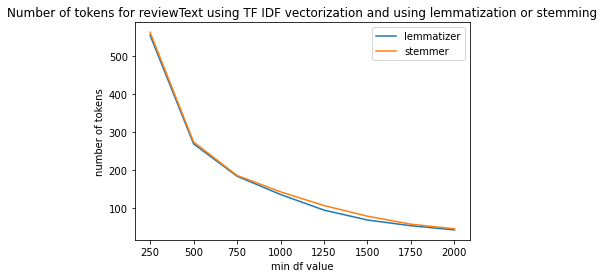

In [33]:
#plot num tokens for each tokenizer with varying min df values
plt.figure()
plt.plot(min_df_list, numTokens_lem, label='lemmatizer')
plt.plot(min_df_list, numTokens_stem, label='stemmer')
plt.legend()
plt.xlabel('min df value')
plt.ylabel('number of tokens')
plt.title('Number of tokens for reviewText using TF IDF vectorization and using lemmatization or stemming')
plt.show()

In [34]:
#obtaining number of tokens using tf idf vectorization based on varying min_df values for summary text 
#using lemmatization or stemming
min_df_list2 = range(200,1201,200)
numTokens_lem2 = []
numTokens_stem2 = []

for i in min_df_list2:
    
    #getting number of tokens using tf idf vectorizer using lemmatization or stemming
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(resetted_index['summary'], tokenizer=fl.spl_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(resetted_index['summary'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem2.append(tokens_l)
    numTokens_stem2.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

beginning tokenization with min_df = 200
vectorization with lemmatization for min_df = 200 complete
vectorization with stemming for min_df = 200 complete
number of tokens appending to corresponding list. min_df = 200 complete
beginning tokenization with min_df = 400
vectorization with lemmatization for min_df = 400 complete
vectorization with stemming for min_df = 400 complete
number of tokens appending to corresponding list. min_df = 400 complete
beginning tokenization with min_df = 600
vectorization with lemmatization for min_df = 600 complete
vectorization with stemming for min_df = 600 complete
number of tokens appending to corresponding list. min_df = 600 complete
beginning tokenization with min_df = 800
vectorization with lemmatization for min_df = 800 complete
vectorization with stemming for min_df = 800 complete
number of tokens appending to corresponding list. min_df = 800 complete
beginning tokenization with min_df = 1000
vectorization with lemmatization for min_df = 1000 com

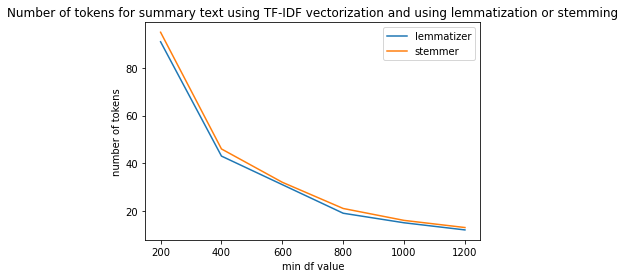

In [35]:
#plot num tokens for each tokenizer with varying min df values for summary text
plt.figure()
plt.plot(min_df_list2, numTokens_lem2, label='lemmatizer')
plt.plot(min_df_list2, numTokens_stem2, label='stemmer')
plt.legend()
plt.xlabel('min df value')
plt.ylabel('number of tokens')
plt.title('Number of tokens for summary text using TF-IDF vectorization and using lemmatization or stemming')
plt.show()

In [90]:
review_tokens = fl.tfidf(resetted_index['reviewText'], tokenizer=fl.spl_tokenizer, ngram_range=(1,2), min_df=1000)

C:\Users\bucco\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [91]:
summary_tokens = fl.tfidf(resetted_index['summary'], tokenizer=fl.spl_tokenizer, ngram_range=(1,2), min_df=800)
summary_tokens.tail()

,s_best,s_five,s_five s_star,s_good,s_great,s_great s_product,s_hair,s_like,s_love,s_nice,s_one,s_one s_star,s_perfect,s_product,s_star,s_work
53071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653671,0.691552,0.0,0.0,0.30736,0.0
53072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653671,0.691552,0.0,0.0,0.30736,0.0
53073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0
53074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0
53075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.00000,0.0


In [92]:
non_token=resetted_index.iloc[:,:12]
non_token.head()

,index,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product
0,11,1.0,1.0,0.000000,0.001638,0.013423,0.727273,0.000000,0.0,1.0,0.0,0.002076
1,20,1.0,1.0,0.000000,0.020475,0.006711,0.909091,0.333333,0.0,1.0,0.0,0.001730
2,31,1.0,1.0,0.000735,0.019247,0.013423,0.727273,0.166667,0.0,1.0,0.0,0.552313
3,144,1.0,1.0,0.000000,0.003686,0.013423,1.000000,0.333333,0.0,1.0,0.0,0.552313
4,146,1.0,1.0,0.000000,0.001638,0.013423,1.000000,0.166667,0.0,1.0,0.0,0.552313


In [105]:
df_final=pd.concat([non_token,summary_tokens,review_tokens],axis=1)
df_final.drop('index', inplace=True, axis=1)
df_final.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,...,r_week,r_well,r_without,r_wonderful,r_work,r_work r_great,r_work r_well,r_worth,r_would,r_year
0,1.0,1.0,0.000000,0.001638,0.013423,0.727273,0.000000,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1.0,1.0,0.000000,0.020475,0.006711,0.909091,0.333333,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1.0,1.0,0.000735,0.019247,0.013423,0.727273,0.166667,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.434028,0.0
3,1.0,1.0,0.000000,0.003686,0.013423,1.000000,0.333333,0.0,1.0,0.0,...,0.0,0.809813,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1.0,1.0,0.000000,0.001638,0.013423,1.000000,0.166667,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [106]:
#we begin by trying to determine the optimal number of clusters by looking at inertia scores
#cycle through different K values and append inertia score to list
k_values = range(8,32)
inertia_scores = []

for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k,init='k-means++', n_init=1, verbose=1)
    #fitting on first 350 PCs
    kmeans_model.fit(df_final)
    #get scores and append them
    inertia = kmeans_model.inertia_
    #append score
    inertia_scores.append(inertia)

Initialization complete
Iteration 0, inertia 120890.10502291648
Iteration 1, inertia 73388.12442085992
Iteration 2, inertia 71894.30917195177
Iteration 3, inertia 70766.87152218905
Iteration 4, inertia 69433.77720248303
Iteration 5, inertia 68755.6718916314
Iteration 6, inertia 68619.833408503
Iteration 7, inertia 68276.26423439311
Iteration 8, inertia 67909.25236949582
Iteration 9, inertia 67906.7718555005
Iteration 10, inertia 67905.90941677082
Iteration 11, inertia 67905.53367631785
Iteration 12, inertia 67905.32450589037
Iteration 13, inertia 67905.14686296892
Iteration 14, inertia 67905.02590248834
Iteration 15, inertia 67904.83526193393
Iteration 16, inertia 67904.46666613175
Iteration 17, inertia 67904.00203556054
Iteration 18, inertia 67903.7346104882
Iteration 19, inertia 67903.60411680795
Iteration 20, inertia 67903.54960774243
Iteration 21, inertia 67903.51004506952
Iteration 22, inertia 67903.45413764876
Converged at iteration 22: center shift 1.0566828877328752e-06 within 

Iteration 39, inertia 60516.53847101136
Iteration 40, inertia 60394.67638125319
Iteration 41, inertia 60320.60457538955
Iteration 42, inertia 60319.52981073097
Iteration 43, inertia 60319.30914906256
Iteration 44, inertia 60319.19860198133
Iteration 45, inertia 60319.114935644306
Iteration 46, inertia 60319.047180616915
Iteration 47, inertia 60319.01573250686
Iteration 48, inertia 60318.97755517996
Iteration 49, inertia 60318.91045437691
Iteration 50, inertia 60318.6922083627
Iteration 51, inertia 60318.40353118466
Iteration 52, inertia 60318.33651055188
Iteration 53, inertia 60318.32977185634
Converged at iteration 53: center shift 5.66992021430796e-07 within tolerance 1.2939863641593503e-06.
Initialization complete
Iteration 0, inertia 104269.55695082723
Iteration 1, inertia 62257.36472206612
Iteration 2, inertia 61118.13612977586
Iteration 3, inertia 60791.09283358685
Iteration 4, inertia 60378.858606282476
Iteration 5, inertia 59750.500796934066
Iteration 6, inertia 59591.827498377

Iteration 10, inertia 56832.28425273604
Iteration 11, inertia 56828.69491155123
Iteration 12, inertia 56827.56953584826
Iteration 13, inertia 56825.90465749589
Iteration 14, inertia 56821.81317787081
Iteration 15, inertia 56819.7915075082
Iteration 16, inertia 56817.87869469626
Iteration 17, inertia 56814.55688662527
Iteration 18, inertia 56812.68836175556
Iteration 19, inertia 56812.199183109864
Iteration 20, inertia 56811.91021074627
Iteration 21, inertia 56811.80859684434
Iteration 22, inertia 56811.78690563547
Iteration 23, inertia 56811.779659216714
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 88007.89698994048
Iteration 1, inertia 58770.8413200623
Iteration 2, inertia 57814.95271053906
Iteration 3, inertia 57320.941802019486
Iteration 4, inertia 56850.658611716506
Iteration 5, inertia 56611.20687153495
Iteration 6, inertia 56319.57298610748
Iteration 7, inertia 56306.06827882488
Iteration 8, inertia 56299.77820182124
Iteration 9, ine

Iteration 26, inertia 52754.53497483521
Converged at iteration 26: strict convergence.


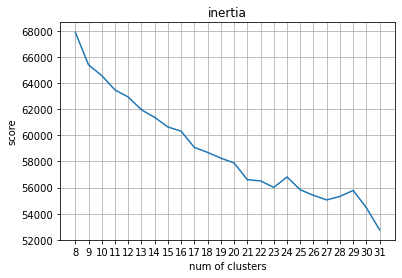

In [108]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()

In [109]:
#instantiate KMeans with 25 clusters
kmeans_model15 = KMeans(n_clusters=23, init='k-means++', n_init=1, verbose=1)
#fitting KMeans on first 350 PCs
kmeans_model15.fit(df_final)

Initialization complete
Iteration 0, inertia 92716.38716909307
Iteration 1, inertia 59429.85272334149
Iteration 2, inertia 57460.735244081145
Iteration 3, inertia 56741.98944192925
Iteration 4, inertia 56556.08552162999
Iteration 5, inertia 56242.46611669212
Iteration 6, inertia 56101.66583340957
Iteration 7, inertia 56083.42962171923
Iteration 8, inertia 56064.30165701605
Iteration 9, inertia 56017.87222785532
Iteration 10, inertia 55866.41714356407
Iteration 11, inertia 55732.872704557514
Iteration 12, inertia 55682.97267147658
Iteration 13, inertia 55656.482320825584
Iteration 14, inertia 55652.094856578
Iteration 15, inertia 55651.44566316711
Iteration 16, inertia 55651.31912423187
Iteration 17, inertia 55651.31461028038
Iteration 18, inertia 55651.310637631184
Converged at iteration 18: strict convergence.


KMeans(n_clusters=23, n_init=1, verbose=1)

In [112]:
#saving model to computer to be used for later analysis
joblib.dump(kmeans_model15, 'kmeans_model15.pkl')

['kmeans_model23.pkl']

In [113]:
#adding cluster labels to the reconstructed dataframe
df_final['cluster'] = kmeans_model15.labels_

In [114]:
#saving the df to the computer in a compressed h5 format (saves faster than other compression techniques)
df_final.to_hdf('df_final_15_kmeans.h5', key='df', mode='w')

In [115]:
df_final.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,...,r_well,r_without,r_wonderful,r_work,r_work r_great,r_work r_well,r_worth,r_would,r_year,cluster
0,1.0,1.0,0.000000,0.001638,0.013423,0.727273,0.000000,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,22
1,1.0,1.0,0.000000,0.020475,0.006711,0.909091,0.333333,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5
2,1.0,1.0,0.000735,0.019247,0.013423,0.727273,0.166667,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.434028,0.0,10
3,1.0,1.0,0.000000,0.003686,0.013423,1.000000,0.333333,0.0,1.0,0.0,...,0.809813,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5
4,1.0,1.0,0.000000,0.001638,0.013423,1.000000,0.166667,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,8


In [116]:
# overall
df_final.groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
0     1.0
12    1.0
21    1.0
20    1.0
19    1.0
18    1.0
17    1.0
16    1.0
15    1.0
14    1.0
13    1.0
22    1.0
1     1.0
10    1.0
8     1.0
7     1.0
6     1.0
5     1.0
4     1.0
3     1.0
9     0.0
2     0.0
11    0.0
Name: overall, dtype: float64

In [122]:
# verified
df_final.groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
5     1.000000
20    1.000000
8     1.000000
15    0.996426
1     0.995316
16    0.993041
3     0.991173
4     0.990532
0     0.990029
6     0.988636
10    0.988106
21    0.987977
19    0.986942
18    0.985262
22    0.982545
17    0.972818
13    0.968093
11    0.953234
2     0.944900
12    0.904762
9     0.895395
7     0.880822
14    0.000000
Name: verified, dtype: float64

In [123]:
#vote
df_final.groupby('cluster').mean().iloc[:,2].sort_values(ascending=False)

cluster
9     0.000658
14    0.000537
17    0.000505
16    0.000417
18    0.000392
20    0.000381
5     0.000372
13    0.000371
6     0.000346
3     0.000285
21    0.000276
19    0.000261
12    0.000255
7     0.000237
10    0.000236
1     0.000183
11    0.000139
2     0.000118
15    0.000066
8     0.000057
0     0.000048
4     0.000047
22    0.000032
Name: vote, dtype: float64

In [129]:
#word Count
df_final.groupby('cluster').mean().iloc[:,3].sort_values(ascending=False)

cluster
13    0.020382
17    0.018814
14    0.017783
16    0.017542
5     0.016635
18    0.015901
6     0.014698
20    0.013956
9     0.013939
21    0.013862
10    0.013542
19    0.013150
7     0.012769
12    0.012573
3     0.012564
1     0.012035
2     0.003308
11    0.003195
8     0.002560
15    0.002390
4     0.001726
0     0.001580
22    0.001478
Name: review_word_count, dtype: float64

In [125]:
df_final.groupby('cluster').mean().iloc[:,7].sort_values(ascending=False)

cluster
20    0.083966
12    0.078818
7     0.061644
0     0.049855
4     0.046977
14    0.046598
8     0.035948
9     0.033916
22    0.033784
11    0.030846
16    0.029228
15    0.023588
2     0.022274
1     0.022248
10    0.021958
17    0.021459
3     0.019730
18    0.017686
13    0.016679
19    0.011970
21    0.006633
5     0.005670
6     0.003444
Name: multipleReviews_reviewer, dtype: float64

In [167]:
#getting names of token features and cluster for analysis
tokens_clust = list(df_final.columns[11:])
#getting the mean token value per cluster
df_tokens = df_final.loc[:,tokens_clust].groupby('cluster').mean() 
df_tokens

,s_best,s_five,s_five s_star,s_good,s_great,s_great s_product,s_hair,s_like,s_love,s_nice,...,r_week,r_well,r_without,r_wonderful,r_work,r_work r_great,r_work r_well,r_worth,r_would,r_year
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.585925,0.586048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000575,0.002399,0.000748,0.001614,0.000230,0.000131,0.000000,0.000614,0.002097,0.005108
1,0.001568,0.000389,0.000389,0.015861,0.017377,0.000000,0.000501,0.007201,0.009512,0.958999,...,0.007702,0.039248,0.009317,0.003686,0.024030,0.010634,0.009023,0.007450,0.028048,0.010455
2,0.000000,0.000000,0.000000,0.000529,0.000000,0.000000,0.000000,0.000893,0.000000,0.000908,...,0.013844,0.006893,0.002888,0.000000,0.055707,0.000000,0.003750,0.013366,0.011780,0.002032
3,0.000000,0.000228,0.000000,0.943705,0.016597,0.000000,0.000404,0.005511,0.011361,0.000000,...,0.011975,0.039619,0.010270,0.004121,0.041551,0.009733,0.013613,0.009212,0.023040,0.017486
4,0.000000,0.584704,0.584826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000565,0.008995,0.000577,0.001781,0.002574,0.000595,0.000000,0.001682,0.004240,0.004405
5,0.000000,0.000038,0.000000,0.000039,0.000085,0.000000,0.000000,0.048095,0.000119,0.000045,...,0.013444,0.033586,0.014013,0.012005,0.034950,0.008316,0.008809,0.010610,0.027033,0.027636
6,0.000000,0.000000,0.000000,0.000186,0.993317,0.000290,0.000215,0.005721,0.000000,0.000000,...,0.010682,0.036354,0.012294,0.009156,0.035463,0.014823,0.008931,0.009496,0.027124,0.025077
7,0.000000,0.000000,0.000000,0.004120,0.010424,0.000000,0.002824,0.003281,0.969872,0.000000,...,0.012955,0.033060,0.013679,0.007734,0.028476,0.005796,0.005541,0.006982,0.026353,0.020877
8,0.000000,0.584359,0.584212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002736,0.016857,0.004761,0.015478,0.002785,0.000000,0.000038,0.004569,0.006433,0.008528


In [171]:
df_summary=df_tokens.iloc[:,:16]
df_summary.head()

,s_best,s_five,s_five s_star,s_good,s_great,s_great s_product,s_hair,s_like,s_love,s_nice,s_one,s_one s_star,s_perfect,s_product,s_star,s_work
cluster,,,,,,,,,,,,,,,,
0,0.000000,0.585925,0.586048,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.559023,0.000000
1,0.001568,0.000389,0.000389,0.015861,0.017377,0.0,0.000501,0.007201,0.009512,0.958999,0.006690,0.000000,0.007401,0.045060,0.000370,0.009650
2,0.000000,0.000000,0.000000,0.000529,0.000000,0.0,0.000000,0.000893,0.000000,0.000908,0.662882,0.670473,0.000000,0.000000,0.297992,0.000860
3,0.000000,0.000228,0.000000,0.943705,0.016597,0.0,0.000404,0.005511,0.011361,0.000000,0.005987,0.000000,0.000000,0.108518,0.000438,0.003142
4,0.000000,0.584704,0.584826,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.559942,0.000000


In [173]:
df_review=df_tokens.iloc[:,16:]
df_review.head()

,r_2,r_also,r_always,r_amazing,r_awesome,r_back,r_beautiful,r_best,r_better,r_bottle,...,r_week,r_well,r_without,r_wonderful,r_work,r_work r_great,r_work r_well,r_worth,r_would,r_year
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.001475,0.001106,0.004079,0.004475,0.000367,0.004651,0.003705,0.000560,0.000737,...,0.000575,0.002399,0.000748,0.001614,0.000230,0.000131,0.000000,0.000614,0.002097,0.005108
1,0.006022,0.016773,0.005290,0.005033,0.004850,0.007338,0.013482,0.004510,0.009641,0.012153,...,0.007702,0.039248,0.009317,0.003686,0.024030,0.010634,0.009023,0.007450,0.028048,0.010455
2,0.011978,0.002813,0.000000,0.000000,0.000000,0.007547,0.000448,0.001930,0.000633,0.015553,...,0.013844,0.006893,0.002888,0.000000,0.055707,0.000000,0.003750,0.013366,0.011780,0.002032
3,0.008001,0.018136,0.008929,0.006453,0.004509,0.008111,0.004612,0.008292,0.013028,0.008658,...,0.011975,0.039619,0.010270,0.004121,0.041551,0.009733,0.013613,0.009212,0.023040,0.017486
4,0.000425,0.001650,0.002663,0.003293,0.004649,0.001896,0.000454,0.001046,0.002410,0.001048,...,0.000565,0.008995,0.000577,0.001781,0.002574,0.000595,0.000000,0.001682,0.004240,0.004405


In [174]:
cluster=22
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_good       0.756320
r_product    0.094863
r_quality    0.048791
r_price      0.043390
r_work       0.027420
r_really     0.023904
r_stuff      0.023435
r_smell      0.023341
r_great      0.017105
r_love       0.016778
r_fast       0.015777
r_far        0.009587
r_color      0.009245
r_nice       0.009005
r_like       0.008247
r_buy        0.007680
r_look       0.007519
r_skin       0.007052
r_easy       0.007001
r_feel       0.006409
Name: 22, dtype: float64
s_five s_star    0.585544
s_five           0.585422
s_star           0.559402
Name: 22, dtype: float64


In [175]:
cluster=0
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_love              0.812371
r_love r_product    0.044151
r_product           0.032626
r_color             0.026656
r_stuff             0.019307
r_great             0.014368
r_smell             0.013770
r_brush             0.011652
r_perfect           0.009725
r_hair              0.009574
r_scent             0.008455
r_soap              0.006695
r_much              0.006360
r_use               0.006174
r_bought            0.005943
r_year              0.005108
r_buy               0.004979
r_beautiful         0.004651
r_nice              0.004504
r_awesome           0.004475
Name: 0, dtype: float64
s_five s_star    0.586048
s_five           0.585925
s_star           0.559023
Name: 0, dtype: float64


In [176]:
cluster=4
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_great              0.623539
r_great r_product    0.206486
r_product            0.141307
r_price              0.051328
r_smell              0.025642
r_quality            0.024945
r_fast               0.023561
r_love               0.020957
r_stuff              0.019039
r_buy                0.016159
r_hair               0.015327
r_look               0.015220
r_color              0.012056
r_brush              0.011277
r_skin               0.011069
r_well               0.008995
r_use                0.008768
r_fit                0.008389
r_easy               0.006431
r_really             0.006209
Name: 4, dtype: float64
s_five s_star    0.584826
s_five           0.584704
s_star           0.559942
Name: 4, dtype: float64


In [177]:
cluster=15
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_work            0.524926
r_work r_great    0.256650
r_great           0.164958
r_work r_well     0.117025
r_well            0.102369
r_really          0.040597
r_love            0.031371
r_product         0.027102
r_like            0.025994
r_hair            0.018291
r_stuff           0.014486
r_smell           0.014092
r_easy            0.013141
r_perfect         0.011857
r_use             0.011649
r_expected        0.011116
r_fast            0.010772
r_look            0.010128
r_nice            0.009552
r_price           0.009314
Name: 15, dtype: float64
s_five s_star    0.584439
s_five           0.584317
s_star           0.560234
Name: 15, dtype: float64


In [178]:
cluster=8
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_perfect      0.061508
r_nice         0.054543
r_product      0.051218
r_excellent    0.045635
r_love         0.034280
r_best         0.034226
r_awesome      0.028698
r_like         0.028535
r_loved        0.026505
r_amazing      0.024137
r_beautiful    0.022133
r_exactly      0.019513
r_use          0.019339
r_expected     0.019287
r_skin         0.018938
r_really       0.018816
r_color        0.018318
r_hair         0.017035
r_smell        0.016984
r_well         0.016857
Name: 8, dtype: float64
s_five           0.584359
s_five s_star    0.584212
s_star           0.560176
Name: 8, dtype: float64


In [179]:
cluster=11
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_work       0.082296
r_didnt      0.049550
r_product    0.046365
r_dont       0.043021
r_like       0.041751
r_doesnt     0.038103
r_good       0.037661
r_money      0.037659
r_hair       0.030171
r_one        0.028667
r_color      0.025155
r_came       0.023056
r_small      0.022944
r_even       0.021853
r_look       0.021458
r_smell      0.020995
r_quality    0.020133
r_made       0.019863
r_get        0.019774
r_use        0.019367
Name: 11, dtype: float64
s_one s_star    0.674944
s_one           0.661558
s_star          0.299979
Name: 11, dtype: float64


In [180]:
cluster=2
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_work       0.055707
r_dont       0.044136
r_product    0.042594
r_didnt      0.042510
r_one        0.036847
r_doesnt     0.034992
r_like       0.032048
r_good       0.030662
r_small      0.028549
r_money      0.026071
r_quality    0.024855
r_came       0.024701
r_color      0.020705
r_made       0.019361
r_get        0.019321
r_use        0.019147
r_fit        0.018870
r_got        0.017541
r_look       0.017043
r_never      0.017038
Name: 2, dtype: float64
s_one s_star    0.670473
s_one           0.662882
s_star          0.297992
Name: 2, dtype: float64


In [184]:
df_cluster22=df_final.loc[df_final['cluster']==22]

In [189]:
pd.set_option('display.max_colwidth',None)
for index,row in df_cluster22.iterrows():
    print(resetted_index.loc[[index],['reviewText']])

                      reviewText
0  great eye liner.  good seller
                           reviewText
38  Well made and sturdy. Good value.
                                                                                reviewText
54  Nice stand. Arrived in good condition. My wife still won't let me leave on the counter
                               reviewText
108  Very good quality razor/brush stand.
                                                  reviewText
244  Great little stand. Looks good on the bathroom counter.
                                                       reviewText
278  Great stand!! Looks so good I take it with me when I travel!
               reviewText
284  Fun and good quality
                                                                            reviewText
301  excellent product !!!! heavy weighted base and good quality holder !!! love it !!
                                                               reviewText
346  Great little stand for razor and 

      reviewText
4548  good razor
             reviewText
4569  This it very good
                                                                             reviewText
4704  Very good shaver.  I don't use them myself but the boys like them.  No complaints
                                           reviewText
4830  Excellent seller and very good quality product.
                    reviewText
4846  Good product and service
     reviewText
4944      Good.
                                        reviewText
5062  Fantastic ! Soft, smooth . It was very good~
     reviewText
5091       GOOD
     reviewText
5094       good
        reviewText
5126  good product
      reviewText
5152  works good
                                                             reviewText
5198  Subtle lavendar fragrance and good foaming cleanser castile soap.
             reviewText
5226  Very good product
                                                                       reviewText
5240  great job keep up the 

              reviewText
9230  Very good product!
                                 reviewText
9269  Very good for sensitive and dry skin!
     reviewText
9270       Good
     reviewText
9281       Good
                     reviewText
9352  Very happy good quality!!
                                   reviewText
9364  good quality, love the different colors
     reviewText
9382       good
     reviewText
9404       Good
       reviewText
9481  Looked good
                                                                        reviewText
9631  This product is excellent. Very good price for a good product. I will highly
         reviewText
9638  Good products
        reviewText
9744  Very Good!!!
          reviewText
9808  very good one.
           reviewText
9831  Smells so good!
                                                  reviewText
9848  Excellent gift for my girls.  Good product, thank you.
                       reviewText
9893  long lasting and good smell
                      

       reviewText
13113  look good!
                                  reviewText
13129  Hard to find these but they are good.
                   reviewText
13155  A good buy! Love them!
                   reviewText
13194  Feels good on my face.
       reviewText
13252  Good item!
       reviewText
13261  Very good!
                        reviewText
13266  Wife like them good bargain
                                       reviewText
13281  Quick shipping and a good quality product.
              reviewText
13282  Really good stuff
                                     reviewText
13289  Very good product, it shipped very fast!
                                                                                         reviewText
13295  Great craft for showers.  Priced well for what you get.  Good selection of colors and styles
                        reviewText
13356  Good product !  Love them !
              reviewText
13389  Good quality oil!
                           reviewText
13517  A

                                   reviewText
17445  very good, product not found in France
      reviewText
17466   its good
                                 reviewText
17497  Good product, visible results quick!
                     reviewText
17510  Worked great! Good value
       reviewText
17514  Good color
                                                                            reviewText
17525  Very good product and the order was processed quickly and received as specified
                        reviewText
17526  Super cute and good quality
         reviewText
17554  Good product
                                                            reviewText
17592  Great for contouring fast shipping very good price! I ordered 2
                                                                                     reviewText
17597  Good brush and does it job contouring. The bristle isn't stuff but that's how i like it.
            reviewText
17611  Good for price.
                      

                       reviewText
21588  I love it very good seller
      reviewText
21592       good
          reviewText
21605  Its very good
                                reviewText
21624  Same as previous sI had and is good
      reviewText
21667       Good
      reviewText
21677  very good
                             reviewText
21690  A little pricey but I looks good
              reviewText
21700  very good incense
                          reviewText
21759  good product at a great price
       reviewText
21764  Good value
              reviewText
21770  Good workmanship.
                                 reviewText
21795  Good product, fast shipping, thanks!
                                                        reviewText
21817  Very good, good product, delivered on time, well satisfied.
                                  reviewText
21831  Just what I expected at a good price.
                         reviewText
21869  Good to do business with, A+
                          re

      reviewText
28494  Very good
                                                reviewText
28536  good product, my girls need it for their thick hair
      reviewText
28546       Good
         reviewText
28550  Good product
                                                                     reviewText
28552  The variety pack is great and a good deal! All brand new with no issues.
                                                             reviewText
28592  Actually really good! Seen a difference in length after 3 weeks.
                         reviewText
28603  Good soap, delivered quickly
                                                reviewText
28693  it's good for muscle pain relief.  high in arnicare
         reviewText
28737  Good product
                       reviewText
28747  Bought as a gift very good
                reviewText
28750  Everything was good
                                                      reviewText
28777  Very good tasting. I was unable to find it any

31655       good
                                                                    reviewText
31659  It's everything I expected and more\nlooks good and put together nicely
      reviewText
31687   ver good
       reviewText
31713  Very good!
      reviewText
31732  Good buy!
      reviewText
31736  pur good.
                                                                   reviewText
31738  Very good product. It's design is great to help get between the teeth.
      reviewText
31775       good
      reviewText
31797       Good
        reviewText
31823  Very good!!
      reviewText
31837       GOOD
      reviewText
31842       Good
      reviewText
31843       Good
      reviewText
31848       good
            reviewText
31895  Really good one
            reviewText
31896  Good on my feet
      reviewText
31923       Good
                                    reviewText
31932  Works very good for dry cracked skin!!!
            reviewText
31937  Good n use full
                       

                                                                                           reviewText
34794  Good mini Aveno samples, haven't used all of them, but the moisturizer is nice and refreshing.
          reviewText
34825  good product.
                            reviewText
34847  Really sturdy and good quality.
        reviewText
34869  Good price!
      reviewText
34874       Good
      reviewText
34897       Good
      reviewText
34909   Good~!!!
                                     reviewText
34912  Excellent shipping time, good product :)
                                                                                                            reviewText
34938  Perfect seller, recomended! good item, accurate description. Good packaging and condition. Thank you very much!
      reviewText
34951       Good
                                    reviewText
35026  I really like the product good quality.
              reviewText
35039  Very good brushes
                        

      reviewText
40580       Good
                                             reviewText
40595  This works so good as a barrier for babies skin.
                                  reviewText
40601  Very good lotion and on time delivery
      reviewText
40606       good
          reviewText
40629  Good Product.
                        reviewText
40637  Works good on a fresh tatoo
                                                 reviewText
40687  Liked it  very  much. Good  for  summer  burn  skin.
                  reviewText
40712  very good. I like it.
      reviewText
40726       Good
         reviewText
40728  good product
      reviewText
40771       good
                                                 reviewText
40857  Very good and very high-quality product as described
                             reviewText
40867  Its pretty good. Will recommend.
                                                                          reviewText
40886  Really good product, hilarious reactions

      reviewText
43704       Good
                                                 reviewText
43751  looked good for what I needed it for this Halloween!
                                           reviewText
43763  Good pallet. Brushes are awesome.  Great value
                                 reviewText
43788  I love this lotion. Smells good too.
                   reviewText
43798  really good product!!!
      reviewText
43799      good!
                                                                             reviewText
43816  Very soft and good quality - I am enjoying them!  Love that they are 100% vegan!
                       reviewText
43838  Great price! Good product!
                                               reviewText
43863  Very good product this is the third year i ordered
       reviewText
43875  Works good
                   reviewText
43877  good price. good item.
                  reviewText
43989  Good product, thanks.
      reviewText
43993       Good
        

                 reviewText
46787  It works really good
                                                      reviewText
46807  Everything arrived on time and the item was good quality.
                                                 reviewText
46837  The clippers are really good and comfortable to use.
              reviewText
46846  Works really good
      reviewText
46850       Good
      reviewText
46895       good
      reviewText
46927       Good
      reviewText
46965       good
             reviewText
46975  it is very good!
                                reviewText
46979  very nice color.  very good service
                          reviewText
46981  Amazing for a very good price
                                                          reviewText
46996  These polishes are great!! Awesome colors! Good for stamping!
                                                                reviewText
46999  Good quality and looks like the picture. Used it for Raven cosplay.
       revie